# Instagram Reach Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

## Importing datasaet

In [2]:
data = pd.read_csv("/content/Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# Checking for null values
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Number of outliers per column: {'Impressions': 14, 'From Home': 8, 'From Hashtags': 7, 'From Explore': 16, 'From Other': 11, 'Saves': 10, 'Comments': 4, 'Shares': 4, 'Likes': 7, 'Profile Visits': 11, 'Follows': 13}
Missing values per column: Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


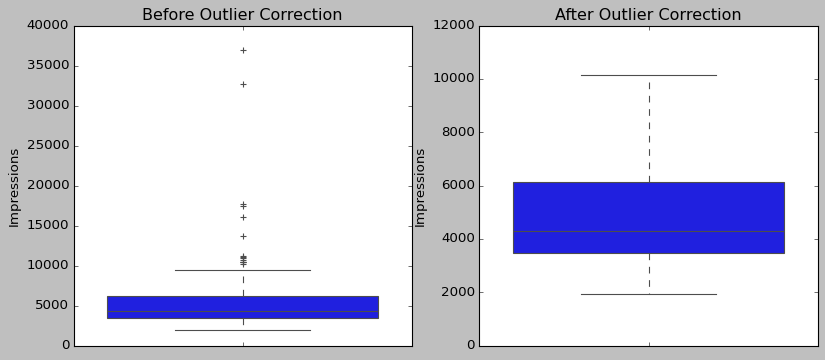

Cleaned dataset saved as 'Instagram_data_cleaned.csv'


In [24]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Function to cap outliers using IQR limits
def cap_outliers(df, columns):
    df_corrected = df.copy()
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_corrected[col] = np.clip(df[col], lower_bound, upper_bound)
    return df_corrected

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers
outliers = detect_outliers_iqr(data, numerical_columns)
print("Number of outliers per column:", {col: len(outliers[col]) for col in outliers if not outliers[col].empty})

# Apply outlier correction
df_cleaned = cap_outliers(data, numerical_columns)

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:", missing_values)

# Generate visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=data["Impressions"], ax=axes[0]).set_title("Before Outlier Correction")
sns.boxplot(y=df_cleaned["Impressions"], ax=axes[1]).set_title("After Outlier Correction")
plt.show()

# Save the cleaned dataset
df_cleaned.to_csv("Instagram_data_cleaned.csv", index=False)
print("Cleaned dataset saved as 'Instagram_data_cleaned.csv'")


### Importing cleaned dataset

In [26]:
data = pd.read_csv("/content/Instagram_data_cleaned.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0          56     98   
1       5394.0     2727.0         1838.0        1174.0          78    194   
2       4021.0     2085.0         1188.0           0.0         433     41   
3       4528.0     2700.0          621.0         932.0          73    172   
4       2518.0     1704.0          255.0         279.0          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9     5.0  162.0            35.0        2   
1         7    14.0  224.0            48.0       10   
2        11     1.0  131.0            62.0       12   
3        10     7.0  213.0            23.0        8   
4         5     4.0  123.0             8.0        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     119 non-null    float64
 1   From Home       119 non-null    float64
 2   From Hashtags   119 non-null    float64
 3   From Explore    119 non-null    float64
 4   From Other      119 non-null    int64  
 5   Saves           119 non-null    int64  
 6   Comments        119 non-null    int64  
 7   Shares          119 non-null    float64
 8   Likes           119 non-null    float64
 9   Profile Visits  119 non-null    float64
 10  Follows         119 non-null    int64  
 11  Caption         119 non-null    object 
 12  Hashtags        119 non-null    object 
dtypes: float64(7), int64(4), object(2)
memory usage: 12.2+ KB


## Data distributions

**distribution of impressions received from home:**

<ipython-input-28-56b9aea354db>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




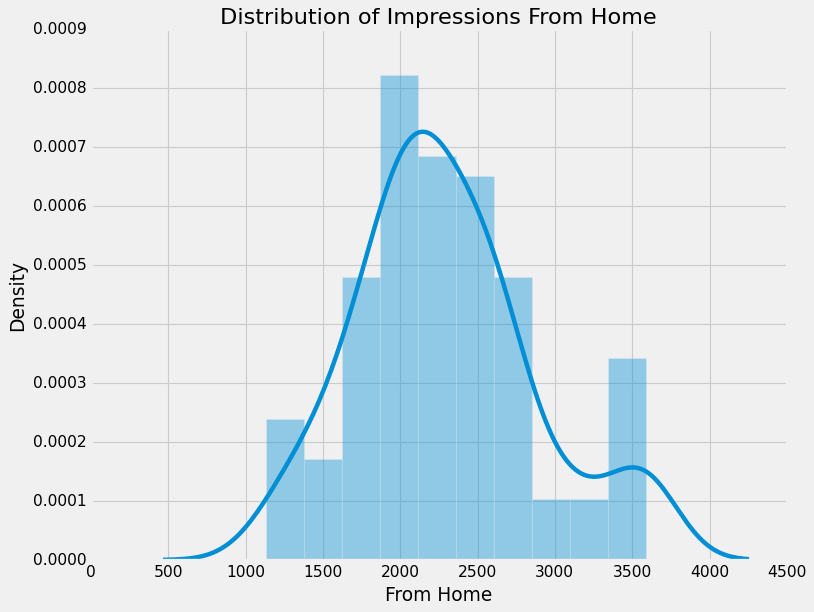

In [28]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

**distribution of the impressions received from hashtags**

<ipython-input-29-8c45b7b41edc>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




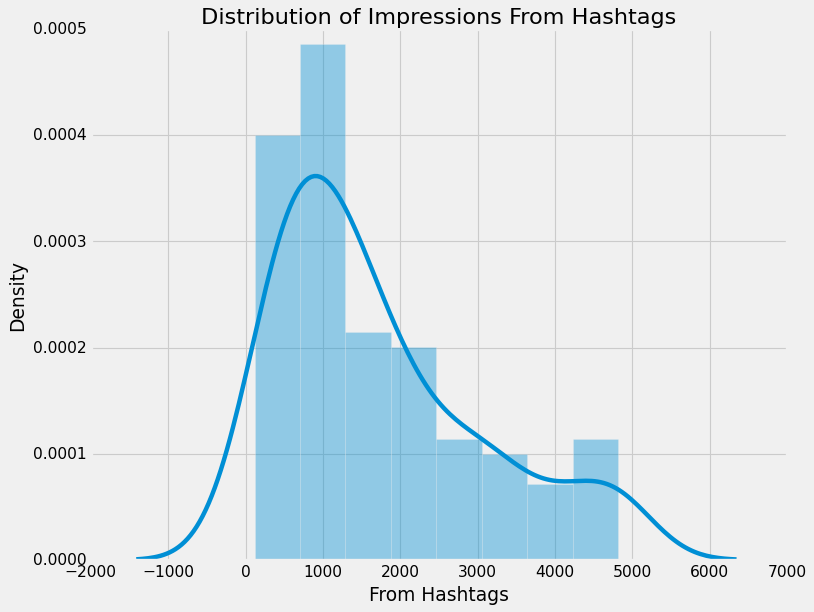

In [29]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

**distribution of impressions received from the explore section**

<ipython-input-30-3461ec84008d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




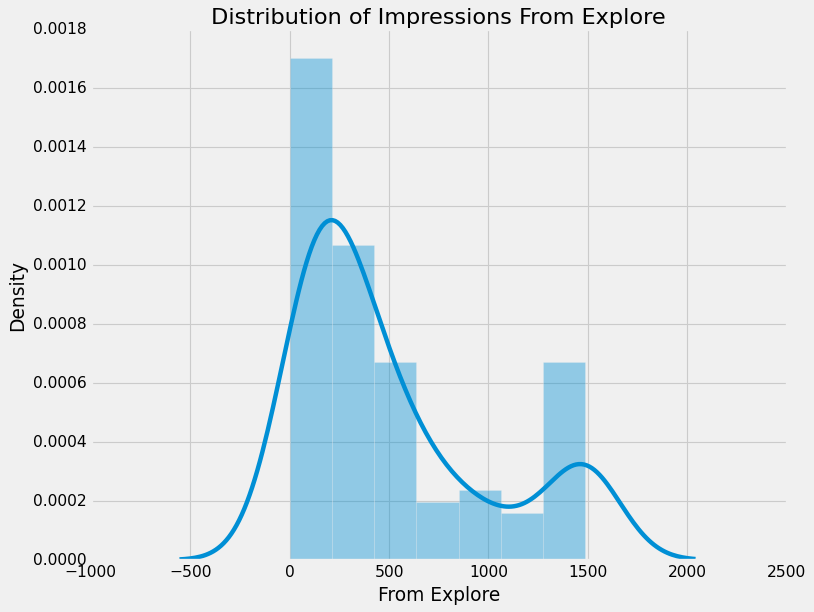

In [30]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

**percentage of impressions from various sources on Instagram**

In [31]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

## Analyzing content

**creating a wordcloud of the caption column to look at the most used words**

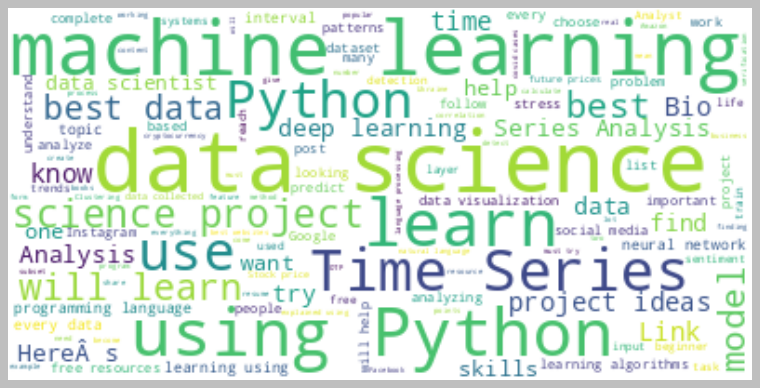

In [32]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**creating a wordcloud of the hashtags column**

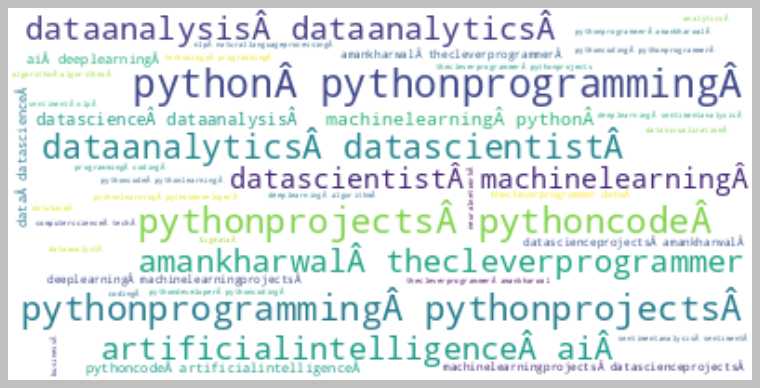

In [33]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing relationships

**the relationship between the number of likes and the number of impressions**

In [34]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach

In [43]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

The number of comments we get on a post doesn’t affect its reach.

In [36]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

In [37]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times the post is saved and the reach of the Instagram post.

## Analyzing Conversion Rate

In [38]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

38.09888846301265


In [39]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

The relationship between profile visits and followers gained is also linear.

# Instagram Reach Prediction Model

In [40]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [41]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8861849165275921

In [42]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11967.01373692])